# Survey responses C5

load and display measurements

In [1]:
import sys
import os
import time

import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.cm as cm
import pingouin as pg

/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [84]:
survey_a = pd.read_csv('../Data/Survey/Stavanger_survey_data.csv')
survey_a

,Age,1.1,1.2,1.3A,1.3B,2.1,2.2,2.3A,2.3B,3.1,...,6.3A,6.3B,7.1,7.2,7.3A,7.3B,8.1,8.2,8.3A,8.3B
0,1.0,9.0,7.0,8.0,9.0,7.0,4.0,9.0,5.0,8.0,...,7.0,5.0,7.0,6.0,7.0,4.0,10.0,10.0,10.0,6.0
1,3.0,10.0,10.0,7.0,7.0,7.0,7.0,10.0,4.0,4.0,...,6.0,5.0,9.0,9.0,9.0,6.0,10.0,10.0,9.0,6.0
2,1.0,10.0,5.0,NaN,8.0,10.0,1.0,5.0,10.0,10.0,...,3.0,10.0,10.0,7.0,10.0,6.0,10.0,10.0,10.0,10.0
3,3.0,10.0,9.0,5.5,7.5,5.0,7.0,7.0,8.0,10.0,...,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0
4,1.0,5.0,4.0,7.0,4.0,8.0,7.0,8.0,3.0,8.0,...,6.0,6.0,8.0,8.0,8.0,3.0,9.0,9.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,3.0,8.0,6.0,7.0,6.0,6.0,6.0,6.0,7.0,8.0,...,NaN,NaN,8.0,8.0,8.0,6.0,8.0,8.0,7.0,7.0
452,1.0,8.0,7.0,8.0,6.0,5.0,6.0,9.0,7.0,5.0,...,8.0,6.0,7.0,7.0,8.0,4.0,5.0,4.0,7.0,5.0
453,3.0,10.0,9.0,5.0,8.0,9.0,9.0,9.0,7.0,7.0,...,5.0,8.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0
454,1.0,8.0,9.0,5.0,1.0,1.0,3.0,10.0,1.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [132]:
print(41/456)
survey_a.isnull().sum(axis=1).value_counts().sort_index()

0.08991228070175439


0     326
1      11
2       9
3       3
4      26
5       2
6       1
7       2
8      18
9       2
10      1
11      1
12      4
13      1
14      1
16      7
17      2
18      1
19      2
20      8
22      1
23      3
24      7
25      3
26      1
27      2
28      2
29      3
30      4
31      2
dtype: int64

In [85]:
survey_a.iloc[:,1:].columns
pieces = ['Saev', 'Reic','Arba','Grie', 'Tcha', 'Chri',
       'Viva', 'Stra'] 
scales = ['Liking','Engagement','Valence','Arousal']
iterables = [pieces, scales]
r_col = pd.MultiIndex.from_product(iterables, names=["Music", "Scale"])
responses = pd.DataFrame(columns = r_col, data = survey_a.iloc[:,1:].values)
responses[('Part','Age')] = survey_a['Age']
resp_df = responses.columns.map('_'.join)

In [91]:
survey_df = pd.DataFrame(data = responses.values,columns = responses.columns.map('_'.join),dtype=float)
# survey_df.iloc[:,range(0,32,4)].columns)
# boxplot = survey_df.boxplot(column=survey_df.iloc[:,range(0,32,4)].columns
survey_df.iloc[:,range(0,32,4)].columns

Index(['Saev_Liking', 'Reic_Liking', 'Arba_Liking', 'Grie_Liking',
       'Tcha_Liking', 'Chri_Liking', 'Viva_Liking', 'Stra_Liking'],
      dtype='object')

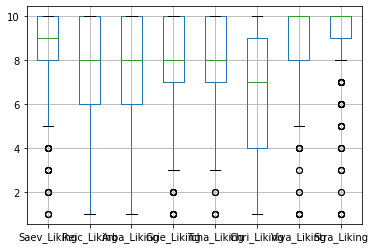

In [92]:
# boxplot = survey_df.boxplot(column=['Saev_Liking', 'Reic_Liking'])
boxplot = survey_df.boxplot(column=['Saev_Liking', 'Reic_Liking', 'Arba_Liking', 'Grie_Liking',
       'Tcha_Liking', 'Chri_Liking', 'Viva_Liking', 'Stra_Liking'])


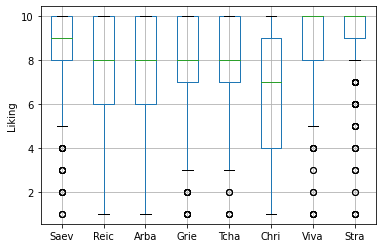

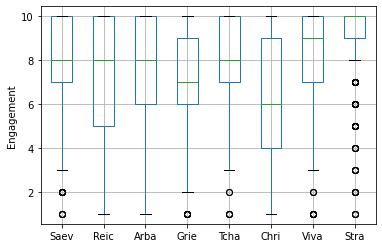

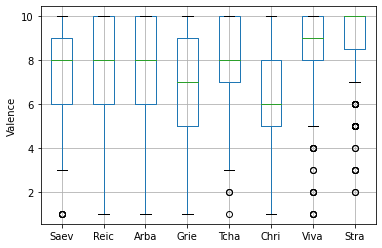

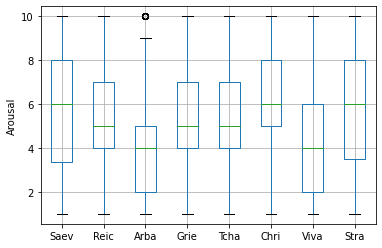

In [101]:
idx = pd.IndexSlice
# dfmi.loc[idx[:, :, ["C1", "C3"]], idx[:, "foo"]]
for s in scales:
    cht = responses.loc[idx[:], idx[:,s]].boxplot()
    cht.set_xticklabels(pieces)
    cht.set_ylabel(s)
    plt.show()

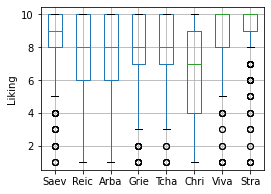

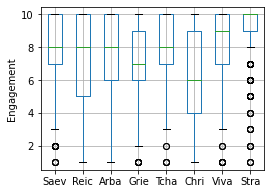

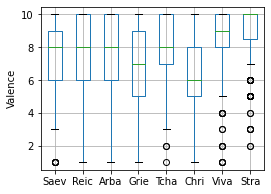

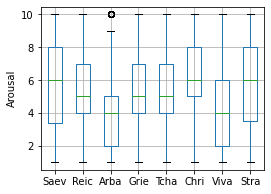

In [102]:
idx = pd.IndexSlice
# dfmi.loc[idx[:, :, ["C1", "C3"]], idx[:, "foo"]]
for s in scales:
    fig, (ax) = plt.subplots(1, 1,figsize = [4,3])
    responses.loc[idx[:], idx[:,s]].boxplot(ax =ax)
    ax.set_xticklabels(pieces)
    ax.set_ylabel(s)
    plt.show()

In [110]:
# responses.loc[idx[:], idx[:,s]]
responses.loc[idx[:], idx['Part','Age']]==1
responses.loc[responses.loc[idx[:], idx['Part','Age']]==1, idx[:,s]]

Music,Saev,Reic,Arba,Grie,Tcha,Chri,Viva,Stra
Scale,Arousal,Arousal,Arousal,Arousal,Arousal,Arousal,Arousal,Arousal
0,9.0,5.0,6.0,5.0,5.0,5.0,4.0,6.0
2,8.0,10.0,1.0,1.0,1.0,10.0,6.0,10.0
4,4.0,3.0,2.0,3.0,5.0,6.0,3.0,2.0
6,3.0,5.0,5.0,3.0,3.0,5.0,1.0,3.0
9,10.0,6.0,1.0,4.0,8.0,2.0,2.0,7.0
...,...,...,...,...,...,...,...,...
446,NaN,6.0,3.0,10.0,8.0,10.0,3.0,8.0
448,9.0,10.0,1.0,1.0,1.0,1.0,1.0,10.0
450,3.5,8.0,8.0,6.0,10.0,6.0,2.0,7.0


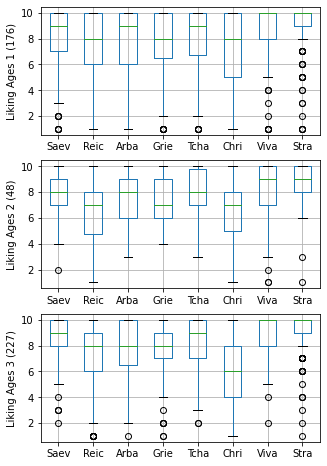

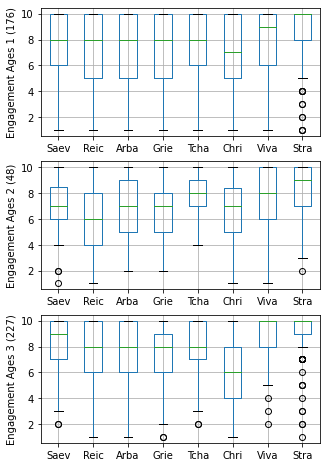

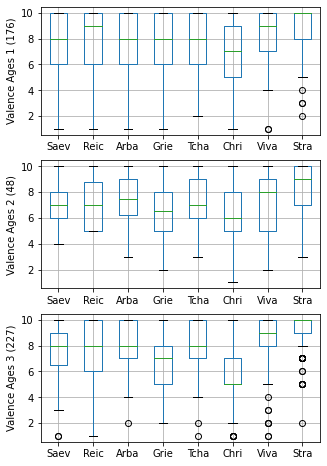

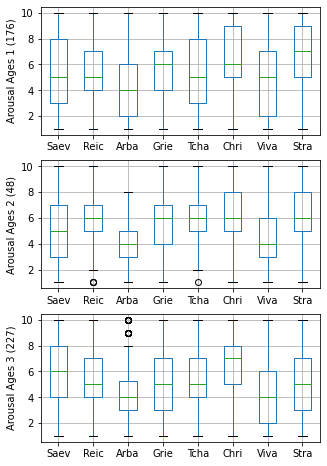

In [116]:
idx = pd.IndexSlice
# dfmi.loc[idx[:, :, ["C1", "C3"]], idx[:, "foo"]]
ages = [1,2,3]
for s in scales:
    fig, (axes) = plt.subplots(3, 1,figsize = [5,8])
    for age in ages:
        ax = axes[age-1]
        responses.loc[responses.loc[idx[:], idx['Part','Age']]==age, idx[:,s]].boxplot(ax =ax)
        ax.set_xticklabels(pieces)
        ax.set_ylabel(s + ' Ages ' + str(age) + ' ('+str(len(responses.loc[responses.loc[idx[:], idx['Part','Age']]==age, idx[:,s]]))+')')
    plt.savefig('_'.join(['Survey',s,'ages.png']),dpi = 200)
    plt.show()

ZeroDivisionError: integer division or modulo by zero

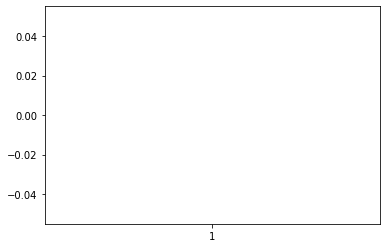

In [66]:
# ax = sns.boxplot(x='Text', y='data', hue="Year", data=b, palette="Set3")
survey_df.iloc[:,range(0,32,4)].boxplot()

In [12]:
Piece_timings['Related'].unique()

array(['Init', 'Saev', 'Reic', 'Arba', 'Abra', 'Grie', 'Tcha', 'Chri',
       'Viva', 'Stra', 'Last'], dtype=object)

In [9]:
Piece_timings = pd.read_csv('./Timing/Concerttimes_Seconds.csv')

Piece_timings.loc[:,['Event','Event_Type','Related','C5']]

,Event,Event_Type,Related,C5
0,Pre-Audio,Stage,Init,-981.902
1,Warmup,Orch,Init,-386.462
2,Tuning,Orch,Init,-225.636
3,Synch Taps,Orch,Init,0.000
4,Applause for Conductor,Applause,Init,-30.137
5,Saevarud,Music,Saev,15.336
6,Applause for Saevarud,Applause,Saev,246.166
7,MC pre Reich,Speech,Reic,257.826
8,Reich,Music,Reic,694.972
9,Applause for Reich,Applause,Reic,802.967
